In [1]:
pip install pyspark


  Using cached pyspark-3.5.1.tar.gz (317.0 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached py4j-0.10.9.7-py2.py3-none-any.whl.metadata (1.5 kB)
Using cached py4j-0.10.9.7-py2.py3-none-any.whl (200 kB)
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488532 sha256=ea7d4d598982ed18cfd8d12c8a3baf91f3ebb2b99d3c485e51b8f97a1ee6dbaf
  Stored in directory: c:\users\dell inspiron 15\appdata\local\pip\cache\wheels\95\13\41\f7f135ee114175605fb4f0a89e7389f3742aa6c1e1a5bcb657
Successfully built pyspark
Note: you may need to restart the kernel to use updated packages.


DayOfWeek            58.263630
Date                 58.263630
DepTime               0.000000
ArrTime               0.000000
CRSArrTime            0.000000
UniqueCarrier         0.000000
Airline               0.000000
FlightNum             0.000000
TailNum               0.000000
ActualElapsedTime     0.000000
CRSElapsedTime        0.000000
AirTime               0.000000
ArrDelay              0.000000
DepDelay              0.000000
Origin                0.000000
Org_Airport           0.242905
Dest                  0.000000
Dest_Airport          0.305231
Distance              0.000000
TaxiIn                0.000000
TaxiOut               0.000000
Cancelled             0.000000
CancellationCode      0.000000
Diverted              0.000000
CarrierDelay          0.000000
WeatherDelay          0.000000
NASDelay              0.000000
SecurityDelay         0.000000
LateAircraftDelay     0.000000
Year                 58.263630
dtype: float64


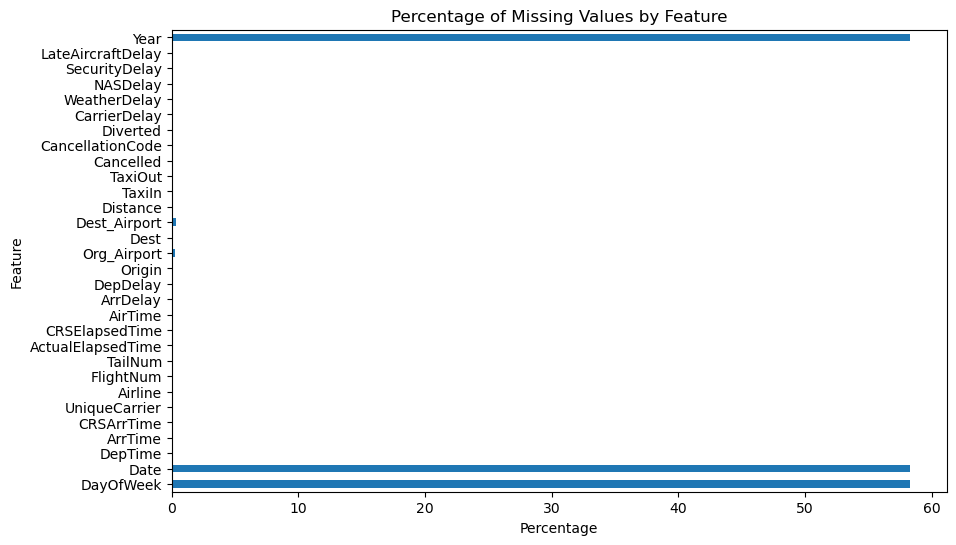

           DayOfWeek                           Date        DepTime  \
count  202234.000000                         202234  484551.000000   
mean        3.966385  2019-03-17 06:34:27.996479488    1564.477865   
min         1.000000            2019-01-01 00:00:00       1.000000   
25%         2.000000            2019-02-04 00:00:00    1234.000000   
50%         4.000000            2019-03-09 00:00:00    1620.000000   
75%         6.000000            2019-05-02 18:00:00    1928.000000   
max         7.000000            2019-06-12 00:00:00    2400.000000   
std         1.940527                            NaN     452.235219   

             ArrTime     CRSArrTime      FlightNum  ActualElapsedTime  \
count  484551.000000  484551.000000  484551.000000      484551.000000   
mean     1617.784438    1652.129929    2139.207386         134.810422   
min         1.000000       1.000000       1.000000          15.000000   
25%      1327.000000    1339.000000     629.000000          80.000000   
50% 

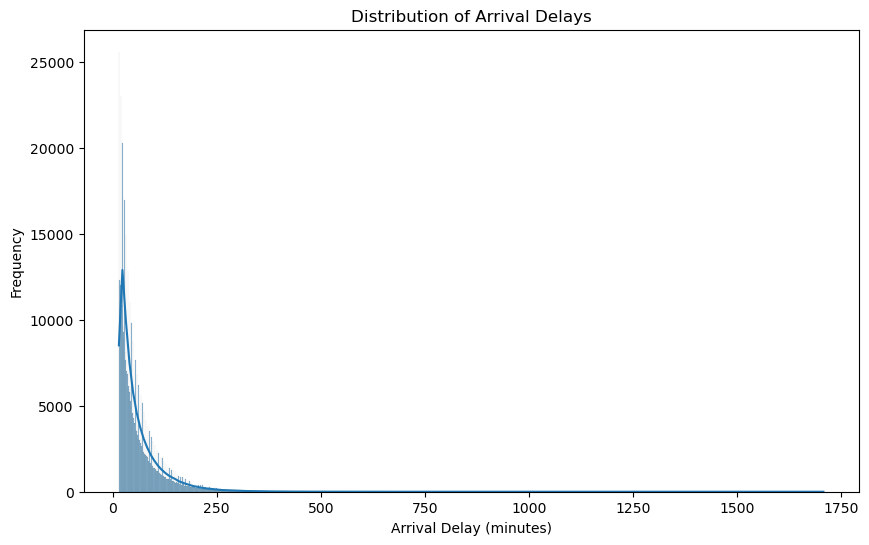

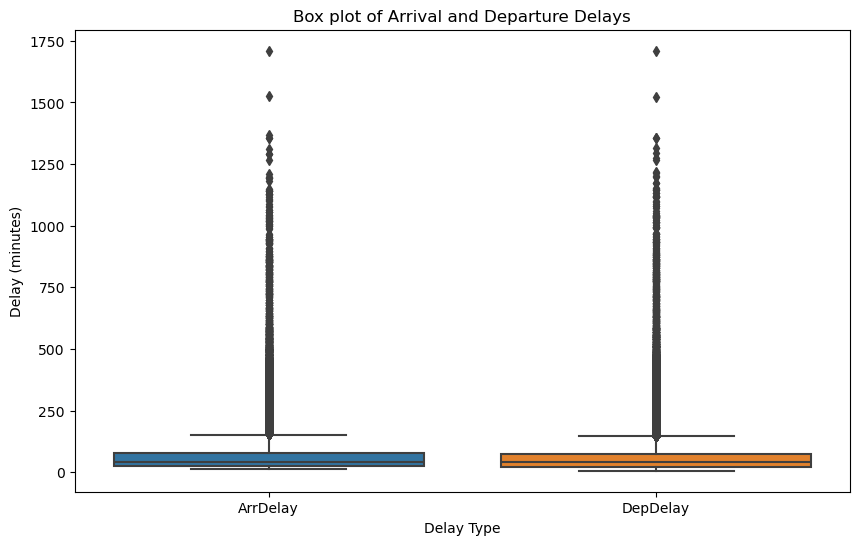

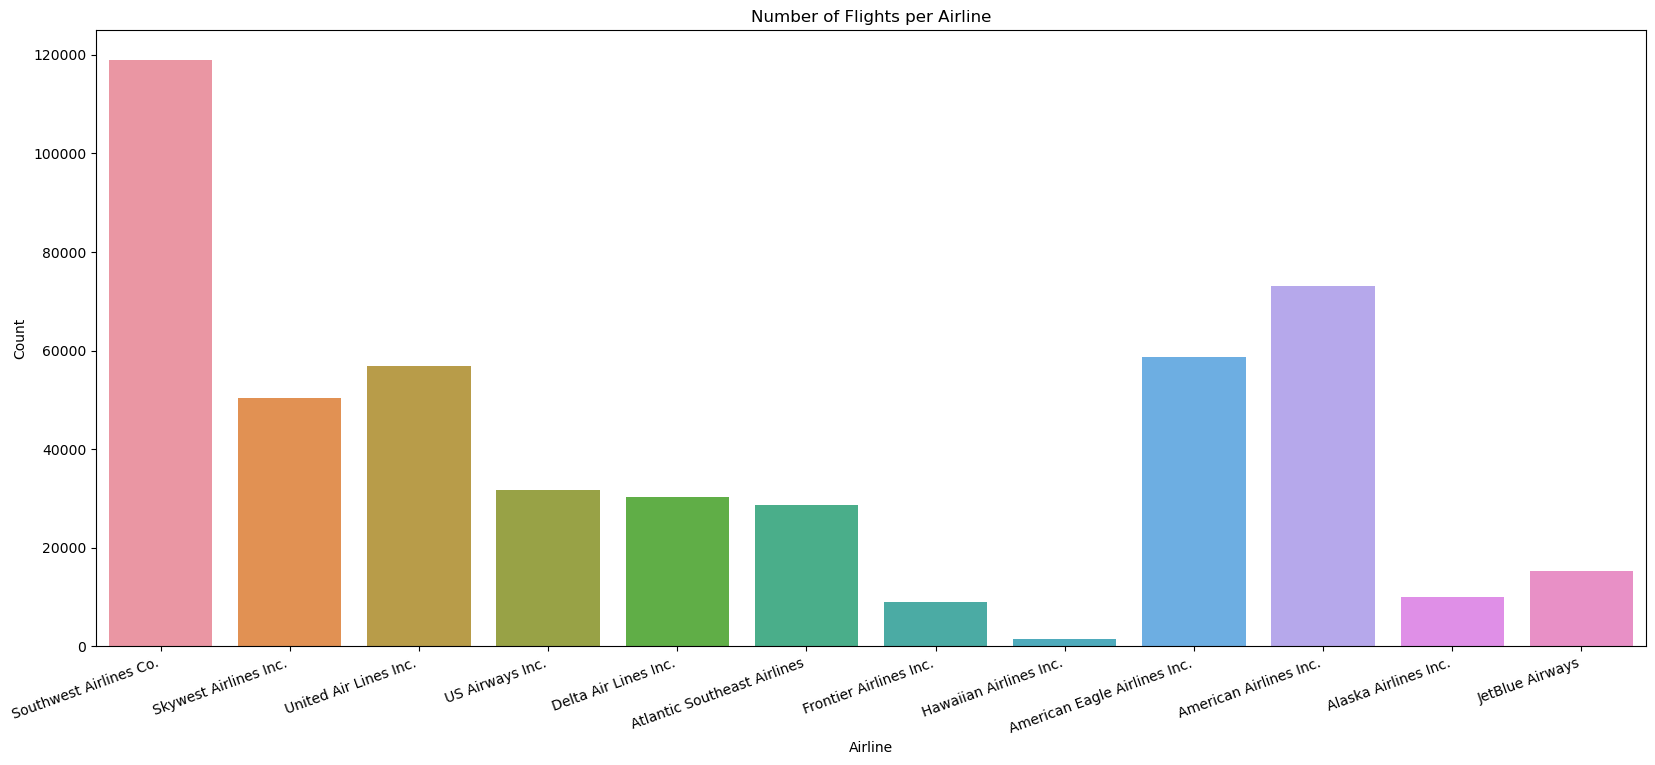

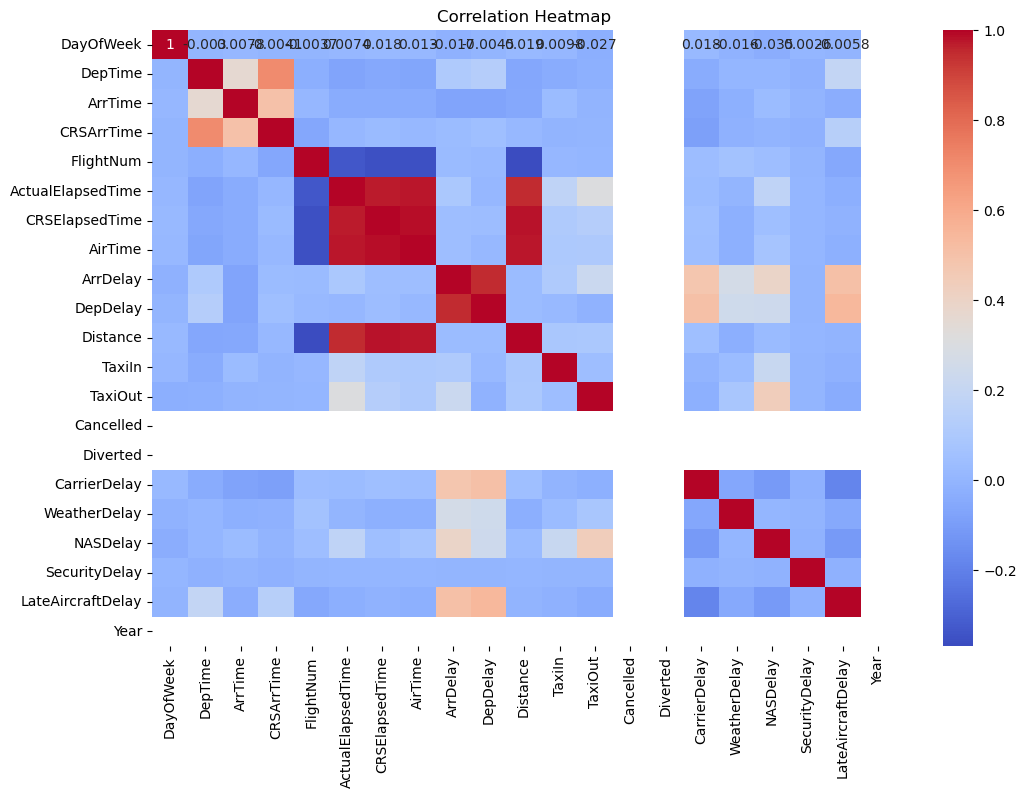

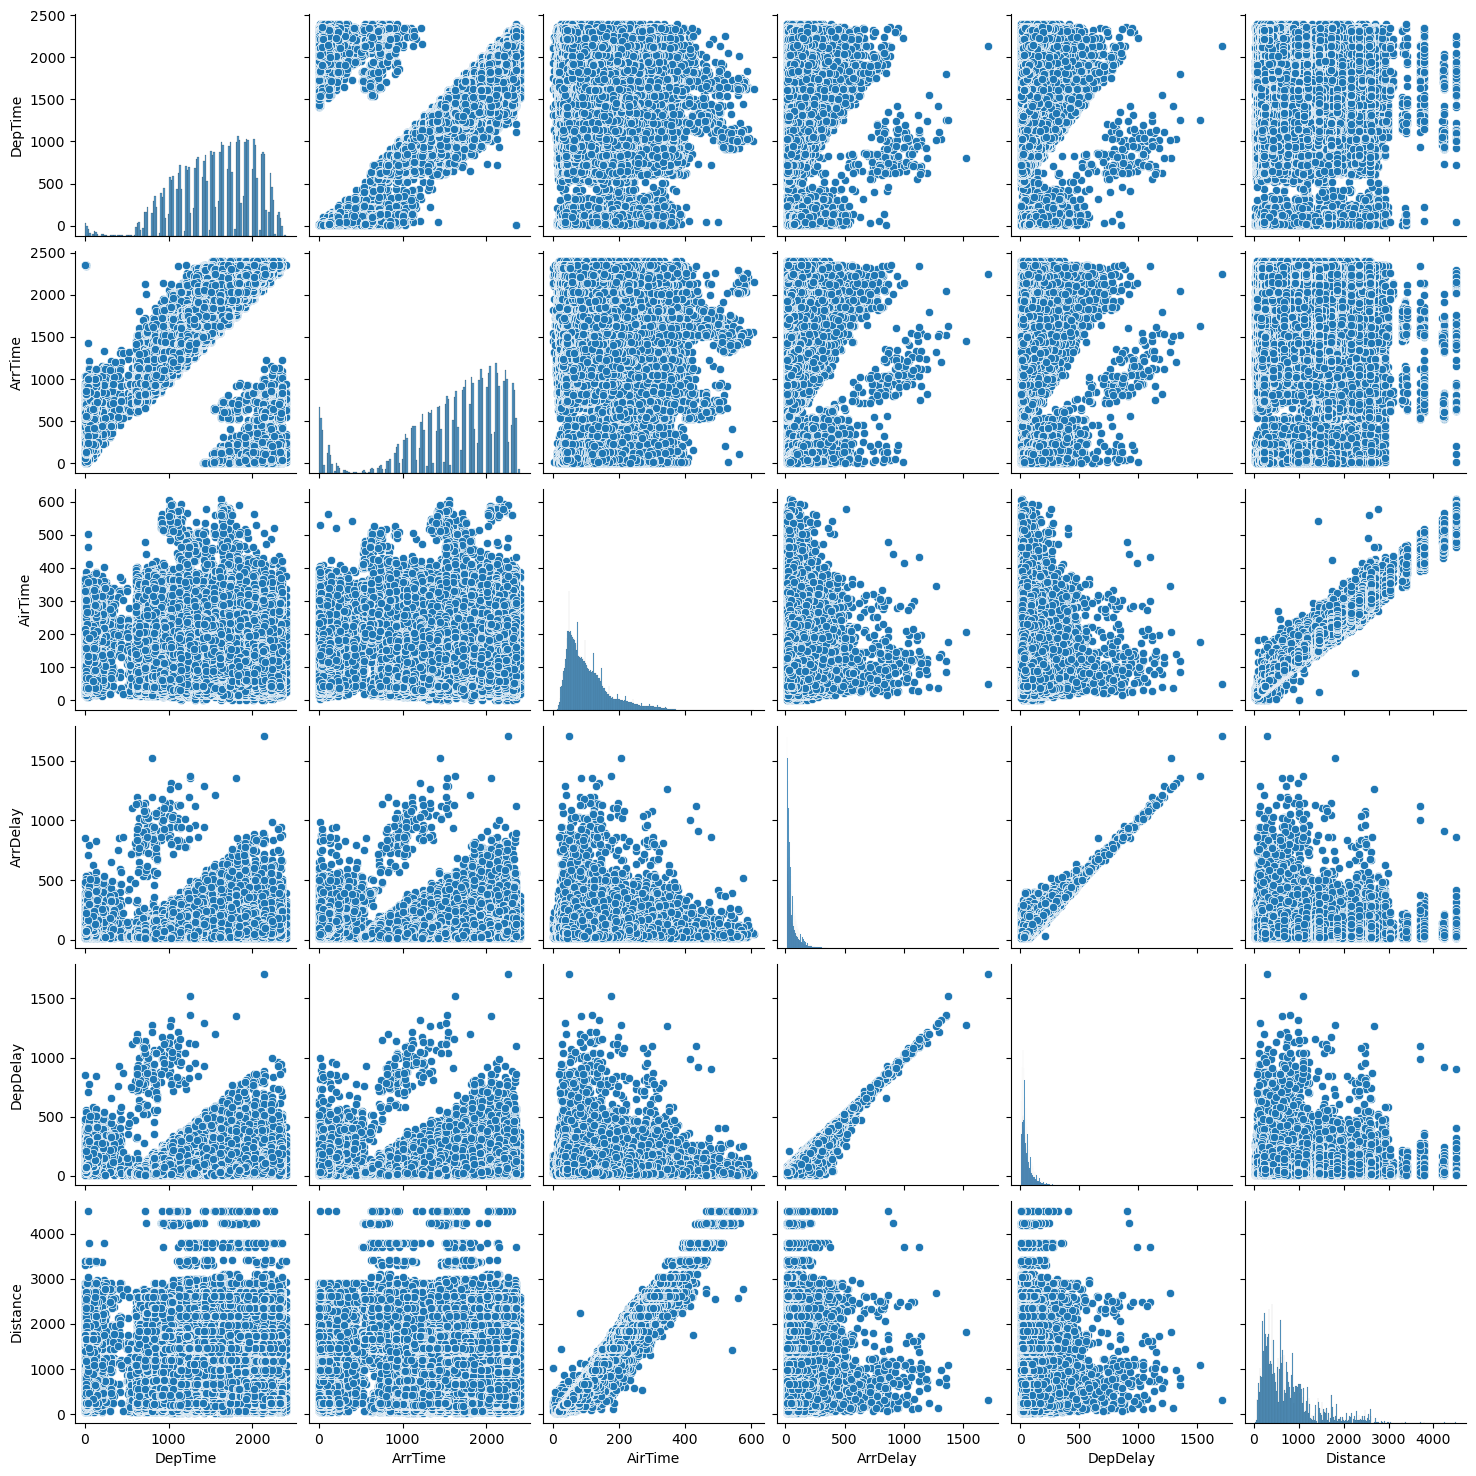

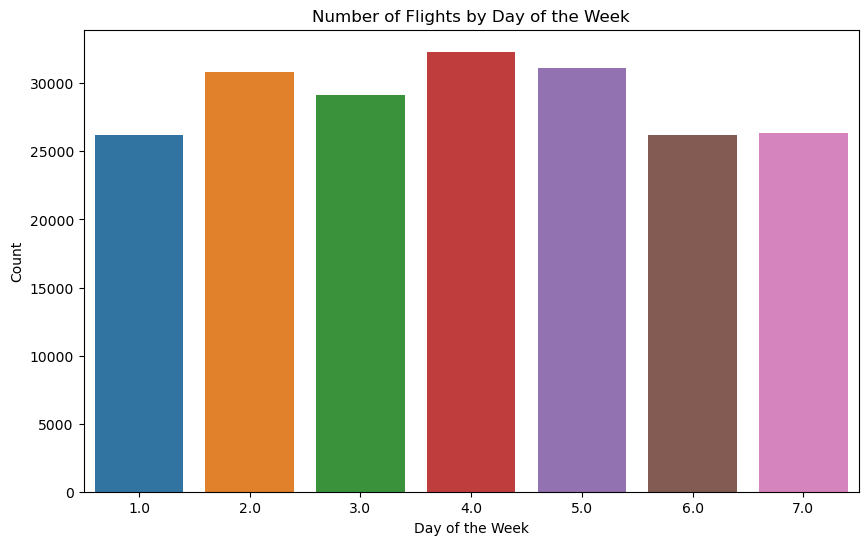

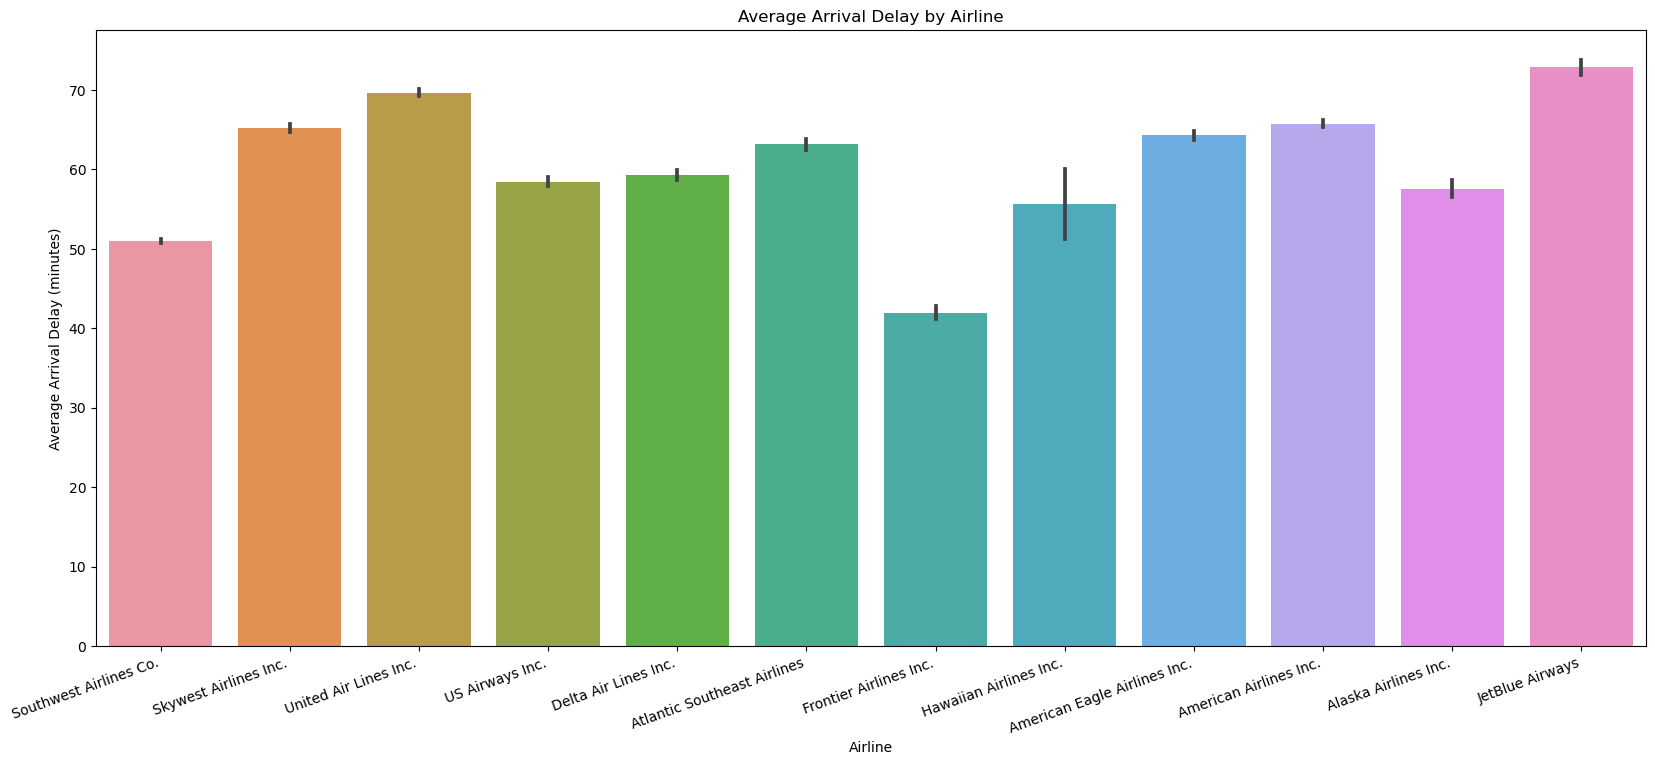

   CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay
0             2             0         0              0                 32
1            10             0         0              0                 47
2             8             0         0              0                 72
3             3             0         0              0                 12
4             0             0         0              0                 16
DayOfWeek
1.0    5.732995
2.0    6.544880
3.0    5.692114
4.0    7.121332
5.0    6.536900
6.0    5.362204
7.0    5.330351
Name: ArrDelay, dtype: float64


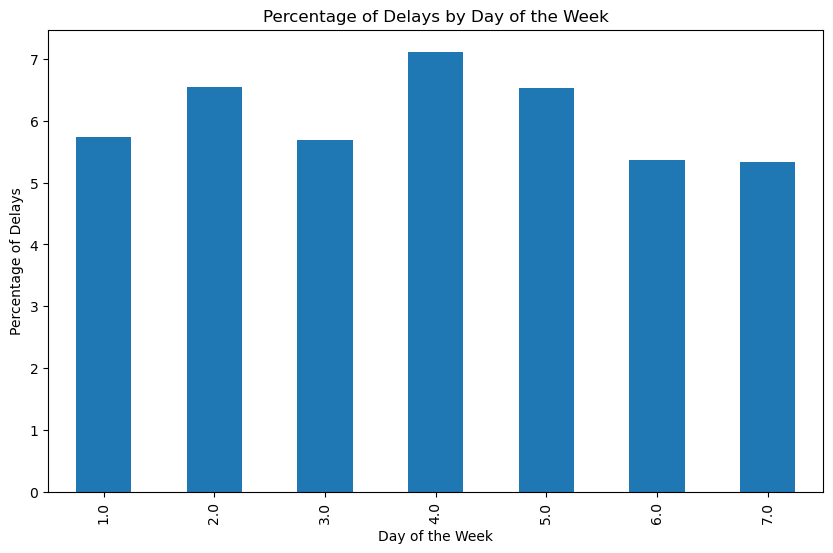

Year
2019.0    42.320776
Name: ArrDelay, dtype: float64


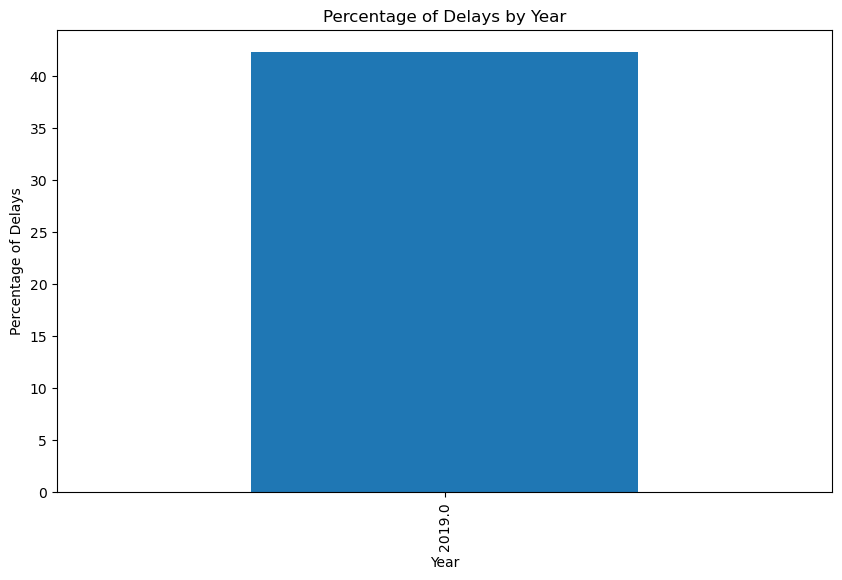

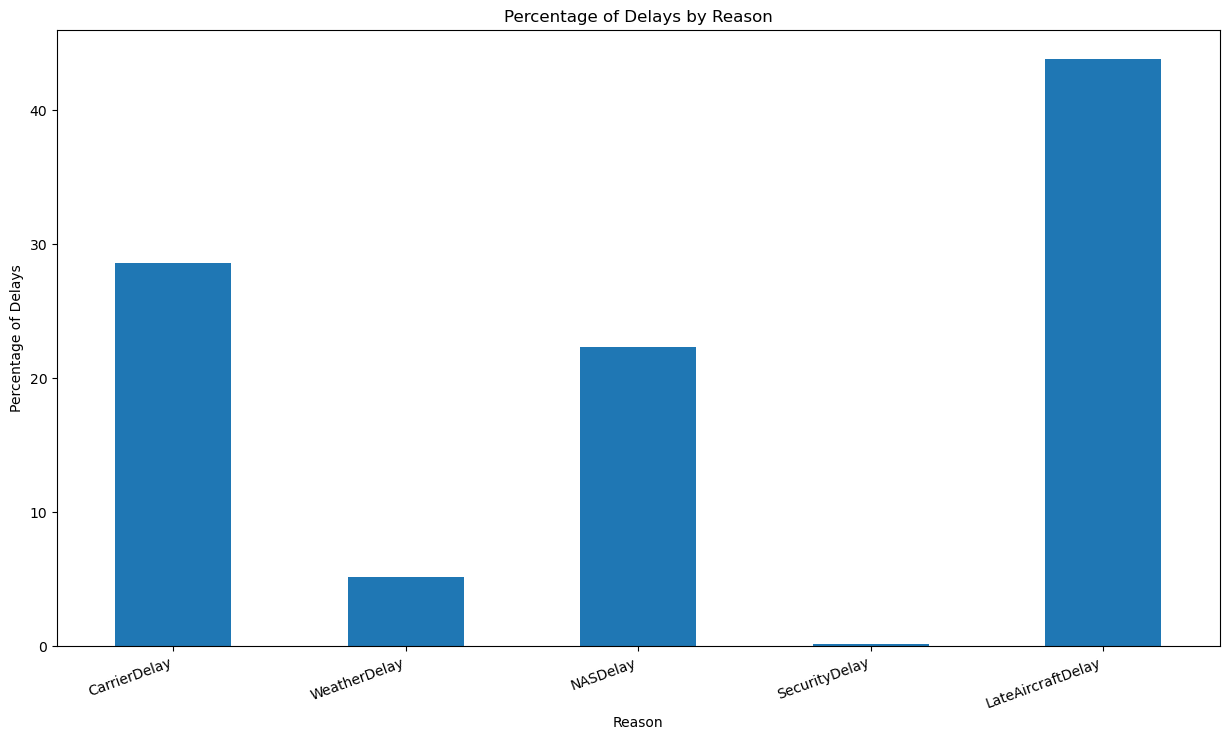

In [4]:
#!/usr/bin/env python3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def main():
    # Dataset file name
    dataset_file = 'Flight_delay.csv'
    
    # Read input data from the dataset file
    data = pd.read_csv(dataset_file)
    
    # Define column names based on your data
    columns = ['DayOfWeek', 'Date', 'DepTime', 'ArrTime', 'CRSArrTime', 
               'UniqueCarrier', 'Airline', 'FlightNum', 'TailNum', 
               'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 
               'ArrDelay', 'DepDelay', 'Origin', 'Org_Airport', 
               'Dest', 'Dest_Airport', 'Distance', 'TaxiIn', 
               'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted', 
               'CarrierDelay', 'WeatherDelay', 'NASDelay', 
               'SecurityDelay', 'LateAircraftDelay']
    
    # Assign column names if they are not present in the CSV file
    if data.columns.size != len(columns):
        data.columns = columns
    
    # Convert columns to appropriate data types
    data['ArrDelay'] = pd.to_numeric(data['ArrDelay'], errors='coerce')
    data['DepDelay'] = pd.to_numeric(data['DepDelay'], errors='coerce')
    data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, errors='coerce')
    data['DayOfWeek'] = data['Date'].dt.weekday + 1
    data['Year'] = data['Date'].dt.year
    data['DepTime'] = pd.to_numeric(data['DepTime'], errors='coerce')
    data['ArrTime'] = pd.to_numeric(data['ArrTime'], errors='coerce')
    data['AirTime'] = pd.to_numeric(data['AirTime'], errors='coerce')
    data['Distance'] = pd.to_numeric(data['Distance'], errors='coerce')
    data['CarrierDelay'] = pd.to_numeric(data['CarrierDelay'], errors='coerce')
    data['WeatherDelay'] = pd.to_numeric(data['WeatherDelay'], errors='coerce')
    data['NASDelay'] = pd.to_numeric(data['NASDelay'], errors='coerce')
    data['SecurityDelay'] = pd.to_numeric(data['SecurityDelay'], errors='coerce')
    data['LateAircraftDelay'] = pd.to_numeric(data['LateAircraftDelay'], errors='coerce')

    # Convert to Pandas DataFrame for EDA
    pdf = data.copy()

    # Analyze Missing Values
    missing_percentage = pdf.isnull().sum() * 100 / len(pdf)
    print(missing_percentage)

    # Plot missing values
    plt.figure(figsize=(10, 6))
    missing_percentage.plot(kind='barh')
    plt.title('Percentage of Missing Values by Feature')
    plt.xlabel('Percentage')
    plt.ylabel('Feature')
    plt.show()

    # Descriptive statistics for numerical columns
    print(pdf.describe())

    # Summarize categorical columns
    print(pdf.describe(include=['object']))

    # Histogram for Arrival Delays
    plt.figure(figsize=(10, 6))
    sns.histplot(pdf['ArrDelay'], kde=True)
    plt.title('Distribution of Arrival Delays')
    plt.xlabel('Arrival Delay (minutes)')
    plt.ylabel('Frequency')
    plt.show()

    # Box plot for Arrival and Departure Delays
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=pdf[['ArrDelay', 'DepDelay']])
    plt.title('Box plot of Arrival and Departure Delays')
    plt.xlabel('Delay Type')
    plt.ylabel('Delay (minutes)')
    plt.show()

    # Bar chart for airlines
    plt.figure(figsize=(20, 8))
    sns.countplot(x='Airline', data=pdf)
    plt.title('Number of Flights per Airline')
    plt.xlabel('Airline')
    plt.ylabel('Count')
    plt.xticks(rotation=20, ha='right')
    plt.show()

    # Filter out non-numeric columns for correlation heatmap
    numeric_cols = pdf.select_dtypes(include=[np.number]).columns

    # Correlation heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(pdf[numeric_cols].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

    # Pair plot for numerical features
    sns.pairplot(pdf[['DepTime', 'ArrTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance']])
    plt.show()

    # Bar chart for flights by day of the week
    plt.figure(figsize=(10, 6))
    sns.countplot(x='DayOfWeek', data=pdf)
    plt.title('Number of Flights by Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Count')
    plt.show()

    # Average delay by airline
    plt.figure(figsize=(20, 8))
    sns.barplot(x='Airline', y='ArrDelay', data=pdf, estimator=lambda x: sum(x) / len(x))
    plt.title('Average Arrival Delay by Airline')
    plt.xlabel('Airline')
    plt.ylabel('Average Arrival Delay (minutes)')
    plt.xticks(rotation=20, ha='right')
    plt.show()

    # Creating a new dataframe by combining different types of delays
    data = [pdf['CarrierDelay'], pdf['WeatherDelay'], pdf['NASDelay'], pdf['SecurityDelay'], pdf['LateAircraftDelay']]
    headers = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
    df_delays = pd.concat(data, axis=1, keys=headers)
    print(df_delays.head())

    # Analysis of delays by day of the week
    delays_by_day = pdf.groupby('DayOfWeek')['ArrDelay'].sum()
    total_delays = pdf['ArrDelay'].sum()
    delays_by_day_percentage = (delays_by_day / total_delays) * 100
    print(delays_by_day_percentage)

    # Plot delays by day of the week
    plt.figure(figsize=(10, 6))
    delays_by_day_percentage.plot(kind='bar')
    plt.title('Percentage of Delays by Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Percentage of Delays')
    plt.show()

    # Analysis of delays by year
    delays_by_year = pdf.groupby('Year')['ArrDelay'].sum()
    delays_by_year_percentage = (delays_by_year / total_delays) * 100
    print(delays_by_year_percentage)

    # Plot delays by year
    plt.figure(figsize=(10, 6))
    delays_by_year_percentage.plot(kind='bar')
    plt.title('Percentage of Delays by Year')
    plt.xlabel('Year')
    plt.ylabel('Percentage of Delays')
    plt.show()

    # Plot delays by reasons
    delay_reasons = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
    delays_by_reason = pdf[delay_reasons].sum()
    delays_by_reason_percentage = (delays_by_reason / total_delays) * 100

    plt.figure(figsize=(15, 8))
    delays_by_reason_percentage.plot(kind='bar')
    plt.title('Percentage of Delays by Reason')
    plt.xlabel('Reason')
    plt.ylabel('Percentage of Delays')
    plt.xticks(rotation=20, ha='right')
    plt.show()

if __name__ == "__main__":
    main()


In [3]:
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.regression import RandomForestRegressor, GBTRegressor, LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, LSTM
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, roc_curve, precision_recall_curve
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# Initialize Spark session
spark = SparkSession.builder \
    .appName("FlightDelayPrediction") \
    .getOrCreate()

# Load the dataset
df = spark.read.csv("Flight_delay.csv", header=True, inferSchema=True)

# Convert categorical features to string type in Spark DataFrame
categorical_columns = ['UniqueCarrier', 'Airline', 'TailNum', 'Origin', 'Org_Airport', 'Dest', 'Dest_Airport', 'CancellationCode']
for col_name in categorical_columns:
    df = df.withColumn(col_name, df[col_name].cast("string"))

# Handle categorical features with StringIndexer in Spark DataFrame
indexers = [StringIndexer(inputCol=col, outputCol=col + "_Index").fit(df) for col in categorical_columns]

# Assemble features in Spark DataFrame
feature_columns = ['DepTime', 'ArrTime', 'AirTime', 'DepDelay', 'Distance', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Split data into training and test sets in Spark DataFrame
train_data, test_data = df.randomSplit([0.7, 0.3], seed=42)

# Initialize models
rf = RandomForestRegressor(featuresCol='features', labelCol='ArrDelay', numTrees=100)
gbt = GBTRegressor(featuresCol='features', labelCol='ArrDelay', maxIter=100)
lr = LinearRegression(featuresCol='features', labelCol='ArrDelay', maxIter=100)

# Create pipelines for each model in Spark DataFrame
pipelines = {
    'Random Forest': Pipeline(stages=indexers + [assembler, rf]),
    'Gradient-Boosted Trees': Pipeline(stages=indexers + [assembler, gbt]),
    'Linear Regression': Pipeline(stages=indexers + [assembler, lr])
}

# Fit models and make predictions in Spark DataFrame
models = {}
predictions = {}
for name, pipeline in pipelines.items():
    print(f"Training {name} model...")
    model = pipeline.fit(train_data)
    models[name] = model
    predictions[name] = model.transform(test_data)

# Evaluate models in Spark DataFrame
evaluator_rmse = RegressionEvaluator(labelCol='ArrDelay', predictionCol='prediction', metricName='rmse')
evaluator_r2 = RegressionEvaluator(labelCol='ArrDelay', predictionCol='prediction', metricName='r2')
evaluator_mae = RegressionEvaluator(labelCol='ArrDelay', predictionCol='prediction', metricName='mae')

# Define function to calculate additional metrics
def calculate_additional_metrics(y_true, y_pred, threshold=15):
    y_true_bin = (y_true > threshold).astype(int)
    y_pred_bin = (y_pred > threshold).astype(int)
    
    auc_roc = roc_auc_score(y_true_bin, y_pred_bin)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true_bin, y_pred_bin, average='binary')
    
    return auc_roc, precision, recall, f1

metrics = {}
for name, pred in predictions.items():
    rmse = evaluator_rmse.evaluate(pred)
    r2 = evaluator_r2.evaluate(pred)
    mae = evaluator_mae.evaluate(pred)
    
    y_true = pred.select('ArrDelay').toPandas()['ArrDelay']
    y_pred = pred.select('prediction').toPandas()['prediction']
    
    auc_roc, precision, recall, f1 = calculate_additional_metrics(y_true, y_pred)
    
    metrics[name] = {
        'RMSE': rmse,
        'R2': r2,
        'MAE': mae,
        'AUC ROC': auc_roc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Print results
for name, metric in metrics.items():
    print(f'{name} - RMSE: {metric["RMSE"]}, R2: {metric["R2"]}, MAE: {metric["MAE"]}, AUC ROC: {metric["AUC ROC"]}, Precision: {metric["Precision"]}, Recall: {metric["Recall"]}, F1 Score: {metric["F1 Score"]}')

# CNN Model - TensorFlow/Keras
def build_cnn(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=input_shape))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Prepare data for CNN
X_train = train_data.select(*feature_columns).toPandas().values
y_train = train_data.select('ArrDelay').toPandas().values
X_test = test_data.select(*feature_columns).toPandas().values
y_test = test_data.select('ArrDelay').toPandas().values

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

cnn_model = build_cnn((X_train.shape[1], 1))
cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Predictions for CNN model
cnn_predictions = cnn_model.predict(X_test)
cnn_rmse = np.sqrt(np.mean((cnn_predictions - y_test)**2))
cnn_r2 = 1 - (np.sum((cnn_predictions - y_test)*2) / np.sum((y_test - np.mean(y_test))*2))
cnn_mae = np.mean(np.abs(cnn_predictions - y_test))

cnn_auc_roc, cnn_precision, cnn_recall, cnn_f1 = calculate_additional_metrics(y_test, cnn_predictions)

metrics['CNN'] = {
    'RMSE': cnn_rmse,
    'R2': cnn_r2,
    'MAE': cnn_mae,
    'AUC ROC': cnn_auc_roc,
    'Precision': cnn_precision,
    'Recall': cnn_recall,
    'F1 Score': cnn_f1
}

print(f'CNN - RMSE: {cnn_rmse}, R2: {cnn_r2}, MAE: {cnn_mae}, AUC ROC: {cnn_auc_roc}, Precision: {cnn_precision}, Recall: {cnn_recall}, F1 Score: {cnn_f1}')

# LSTM Model - TensorFlow/Keras
def build_lstm(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Prepare data for LSTM
X_train_lstm = X_train
X_test_lstm = X_test

lstm_model = build_lstm((X_train_lstm.shape[1], 1))
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=1)

# Predictions for LSTM model
lstm_predictions = lstm_model.predict(X_test_lstm)
lstm_rmse = np.sqrt(np.mean((lstm_predictions - y_test)**2))
lstm_r2 = 1 - (np.sum((lstm_predictions - y_test)*2) / np.sum((y_test - np.mean(y_test))*2))
lstm_mae = np.mean(np.abs(lstm_predictions - y_test))

lstm_auc_roc, lstm_precision, lstm_recall, lstm_f1 = calculate_additional_metrics(y_test, lstm_predictions)

metrics['LSTM'] = {
    'RMSE': lstm_rmse,
    'R2': lstm_r2,
    'MAE': lstm_mae,
    'AUC ROC': lstm_auc_roc,
    'Precision': lstm_precision,
    'Recall': lstm_recall,
    'F1 Score': lstm_f1
}

print(f'LSTM - RMSE: {lstm_rmse}, R2: {lstm_r2}, MAE: {lstm_mae}, AUC ROC: {lstm_auc_roc}, Precision: {lstm_precision}, Recall: {lstm_recall}, F1 Score: {lstm_f1}')

# Print input features and actual vs predicted values for the first 5 rows for each model
def print_predictions(predictions, feature_columns, num_rows=5):
    for name, pred in predictions.items():
        print(f"\n{name} Model - Actual vs Predicted Values")
        pred.select(*feature_columns, 'ArrDelay', 'prediction').show(num_rows)

print_predictions(predictions, feature_columns)

# Convert metrics to DataFrame for plotting
metrics_df = pd.DataFrame(metrics).transpose()

# Plotting the metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# RMSE
metrics_df['RMSE'].plot(kind='bar', ax=axes[0, 0], title='RMSE', color='blue')
axes[0, 0].set_ylabel('RMSE')

# R2
metrics_df['R2'].plot(kind='bar', ax=axes[0, 1], title='R2', color='green')
axes[0, 1].set_ylabel('R2')

# MAE
metrics_df['MAE'].plot(kind='bar', ax=axes[1, 0], title='MAE', color='red')
axes[1, 0].set_ylabel('MAE')

# F1 Score
metrics_df['F1 Score'].plot(kind='bar', ax=axes[1, 1], title='F1 Score', color='purple')
axes[1, 1].set_ylabel('F1 Score')

plt.tight_layout()
plt.show()

# Stop the Spark session
spark.stop()

PySparkRuntimeError: [JAVA_GATEWAY_EXITED] Java gateway process exited before sending its port number.